In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
df = pd.read_csv('./403.csv')
df.head(25)

,lat,lon
0,20.913162,70.380478
1,21.126022,70.123672
2,19.039993,73.019943
3,12.903442,77.543466
4,28.601303,77.236404
5,12.259859,79.679031
6,21.871719,83.377304
7,15.444031,75.004349
8,21.874466,83.371811
9,9.927177,78.124809


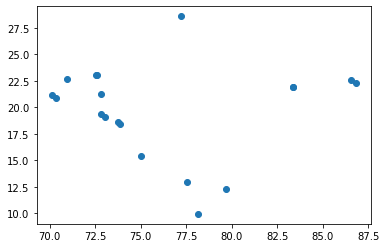

In [3]:
plt.scatter(x=df['lon'], y=df['lat'])
plt.show()

In [4]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   

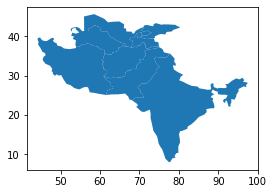

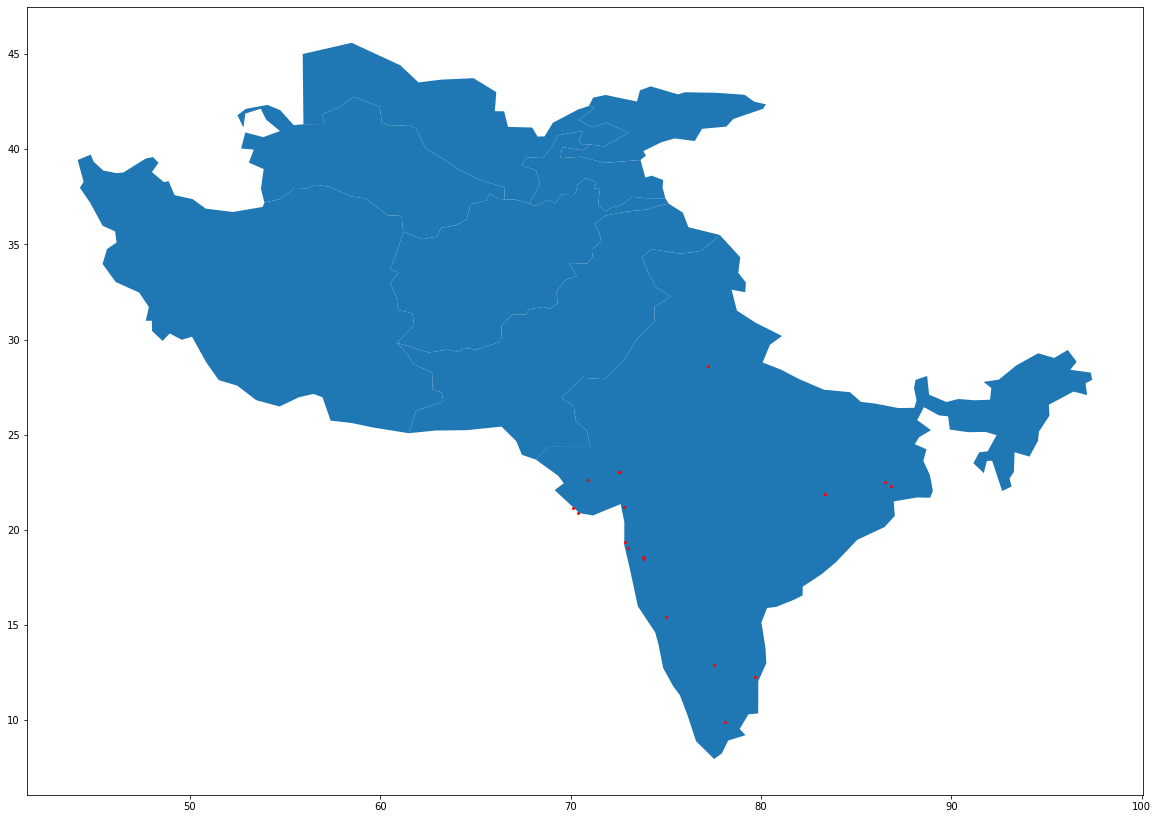

In [5]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
southern_world = world.cx[60:70, 0:40]
southern_world.plot(figsize=(10, 3));
gdf.plot(ax=southern_world.plot(figsize=(20, 20)), marker='.', color='red', markersize=15);

In [6]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
india_map = gpd.read_file('India_Districts_ADM2_GADM/India_Districts_ADM2_GADM.shp')

<AxesSubplot:>

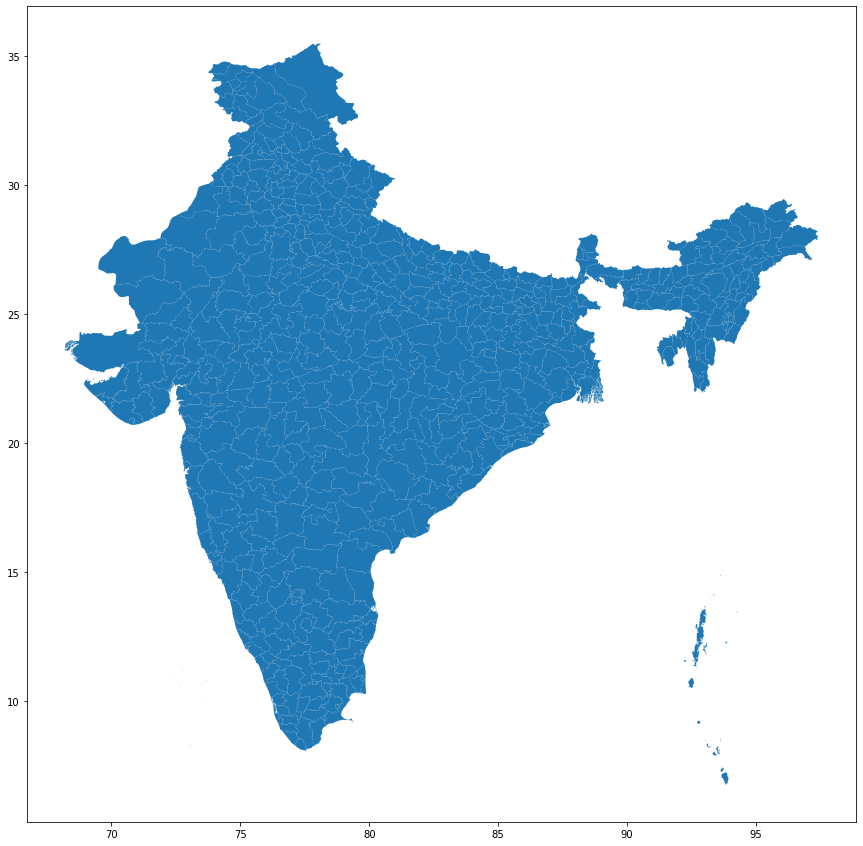

In [8]:
fig,ax = plt.subplots(figsize = (15,15))
india_map.plot(ax = ax)

In [9]:
df = pd.read_csv('./403.csv')
crs = {'init': 'espg:4326'}
df.head()

,lat,lon
0,20.913162,70.380478
1,21.126022,70.123672
2,19.039993,73.019943
3,12.903442,77.543466
4,28.601303,77.236404


In [10]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geometry[:3]   

In [11]:
gdf = gpd.GeoDataFrame(df, crs = crs, geometry=geometry)
gdf.head()

,lat,lon,geometry
0,20.913162,70.380478,POINT (70.38048 20.91316)
1,21.126022,70.123672,POINT (70.12367 21.12602)
2,19.039993,73.019943,POINT (73.01994 19.03999)
3,12.903442,77.543466,POINT (77.54347 12.90344)
4,28.601303,77.236404,POINT (77.23640 28.60130)


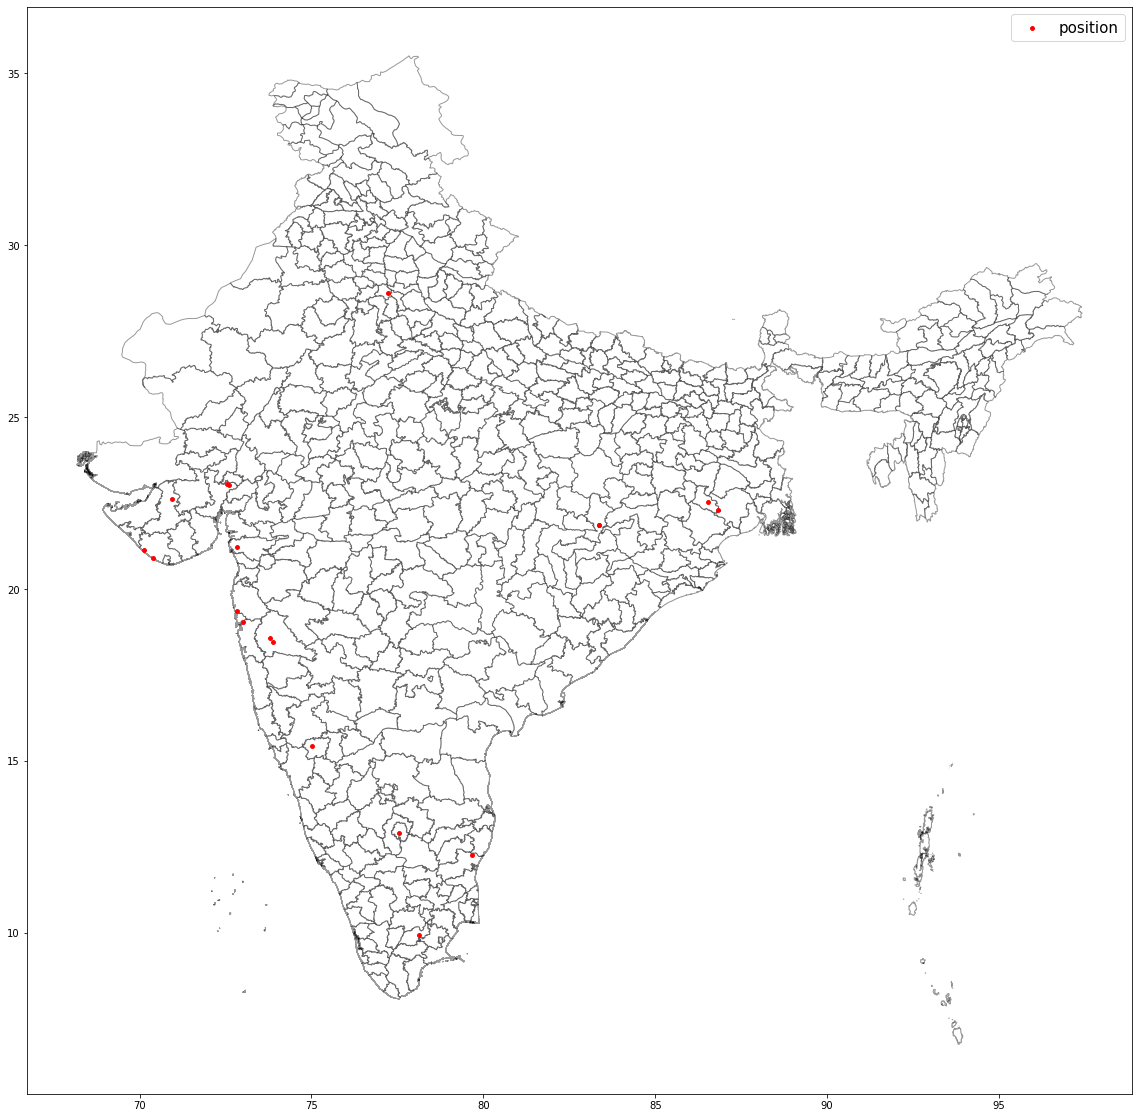

In [12]:
fig,ax = plt.subplots(figsize = (20,20))

# TO change the color/outline of the map change the values of color/edgecolor respectively
india_map.plot(ax = ax, alpha = 0.4, color = 'white', edgecolor = 'black')

#TO change the size of point marked on the map cange the markersize
gdf.plot(ax = ax, markersize = 15, color = 'red', label = 'position')

plt.legend(prop={'size': 15})